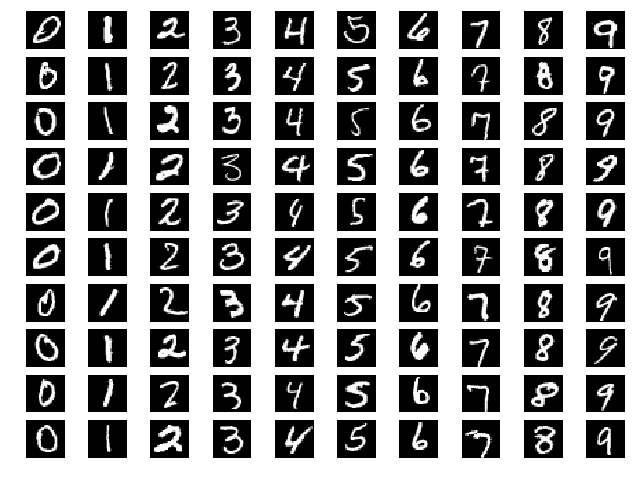

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

size = 10

# load data
train = np.loadtxt('train.csv', dtype=int, delimiter=',', skiprows=1)
labels, data = train[:,0], train[:,1:]

# plot some random images
fig, axarr = plt.subplots(size, 10)
for num in range(10):
    idx_num = np.argwhere(labels==num).flatten()
    idx = np.random.choice(idx_num, size=size, replace=False)
    sample = data[idx]
    for i in range(size):
        axarr[i, num].imshow(sample[i].reshape((28, 28)))
        axarr[i, num].axis('off')

In [3]:
from sklearn.neighbors import KNeighborsClassifier as KNC

knc = KNC(n_neighbors=3, n_jobs=-1)
knc.fit(data, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

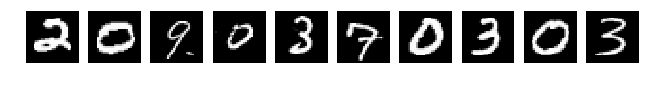

In [4]:
# load test data
test = np.loadtxt('test.csv', dtype=int, delimiter=',', skiprows=1)
# visualize some images
fig, axarr = plt.subplots(1, size)
for i in range(size):
    axarr[i].imshow(test[i].reshape((28, 28)))
    axarr[i].axis('off')

In [5]:
# predict labels
prediction = knc.predict(test)
print 'Predicted labels:', prediction[:size]

Predicted labels: [2 0 9 9 3 7 0 3 0 3]


In [6]:
out = np.stack((np.arange(1, len(prediction) + 1), prediction), axis=-1)
np.savetxt('prediction.csv', out, fmt='%d', delimiter=',',
           header='ImageId,Label', comments='')